In [60]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [61]:
df=pd.read_csv("glass.csv",names=["Id","Ri","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of Glass"])

In [62]:
df.head()  #  Checking the first 5 rows of the data

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Id number: 1 to 214
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute) -->
       
About data
The purpose of the dataset is predict the class of the Glass based upon the given features there’re around 9 features (Id number, RI, Na, Mg, Al, Si, K, Ca, Ba) In which all the columns except the Id columns plays an important role in determining the type of the Glass which also our target variable there are 7 types of glasses are in the description provided about the dataset but in a dataset of glasses we don’t have data about type 4 glass each type of glass has it’s own name but in a data the target variable in numbered from 1 to 7. So, based upon the available features we have to predict the target variable (type of glass).

In [63]:
df.shape  # Checking the rows and columns size of the data

(214, 11)

Total Rows  : 214
Total Columns : 11 (10 Features and 1 Target)

## Data Analysis

In [64]:
df.info() #  getting the information about the data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   Ri             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Observation :  
>All the columns has 214 rows -  So No null / Missing data in nay rows.
>ID / Type of Glass columns hold the integer type of data
>Rest of the columns hold the float64 type of data.

In [65]:
df.isnull().sum()  # Checking the null values with sum function

Id               0
Ri               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

In [66]:
df[df.duplicated()]

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass


*No duplicate value in data*

In [67]:
df["Type of Glass"].unique() # checking the unique values of Target column.

array([1, 2, 3, 5, 6, 7], dtype=int64)

*About data
The purpose of the dataset is predict the class of the Glass based upon the given features there’re around 9 features (Id number, RI, Na, Mg, Al, Si, K, Ca, Ba) In which all the columns except the Id columns plays an important role in determining the type of the Glass which also our target variable there are 7 types of glasses are in the description provided about the dataset but in a dataset of glasses we don’t have data about type 4 glass each type of glass has it’s own name but in a data the target variable in numbered from 1 to 7. So, based upon the available features we have to predict the target variable (type of glass).*

In [68]:
df["Type of Glass"].value_counts()  # counts for Each type of Glass

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

*Type of Glass Observation :*

The dataset is pretty unbalanced. The instances of types 1 and 2 constitute more than 67 % of the glass types.

    > Type 1 and 2 are Higher in number compare to other type of glass
    > There is no Type 4 Glass at all in data

## EDA

In [69]:
df.describe().T  #  to know the statistic information of each columns when the data is continuous number

,count,mean,std,min,25%,50%,75%,max
Id,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
Ri,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


**Observation:**
>>*ID* - its id columns and it's irrevant information for model
>> Apart from Ba and FE , rest of the column mean and median are too close and have small -/+ variance. 
>> BA and Fe has 0 median value which show the sign the data is right skewed. 
>>The features are not on the same scale. For example Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to run smoothly. Let's go ahead and check the distribution of the glass types.

# Univariate Analysis

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
features = df.columns[:-1].tolist() # getting independant columns to list for graph analysis

Feature Name : Id 	 - Skewness : 0.0
Feature Name : Ri 	 - Skewness : 1.6254305060087644
Feature Name : Na 	 - Skewness : 0.4541814536577495
Feature Name : Mg 	 - Skewness : -1.1525593175802356
Feature Name : Al 	 - Skewness : 0.9072898090246346
Feature Name : Si 	 - Skewness : -0.7304472251318588
Feature Name : K 	 - Skewness : 6.55164830960496
Feature Name : Ca 	 - Skewness : 2.0470539131183103
Feature Name : Ba 	 - Skewness : 3.4164245693025577
Feature Name : Fe 	 - Skewness : 1.754327470435831


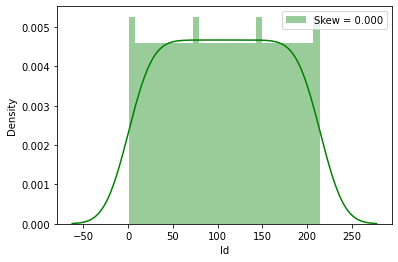

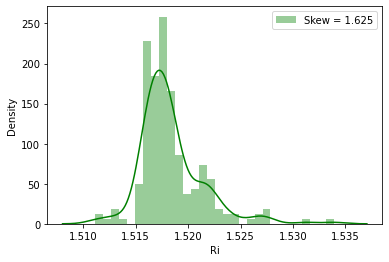

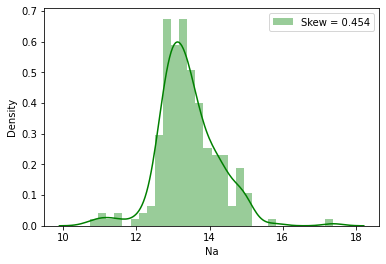

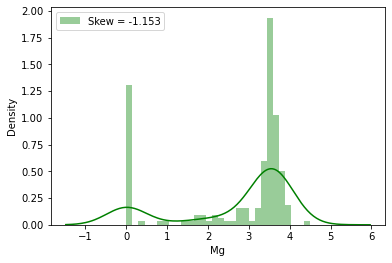

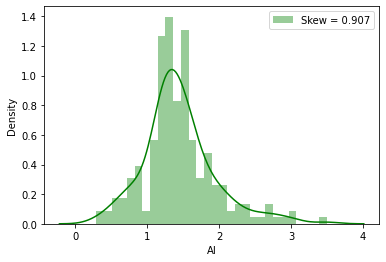

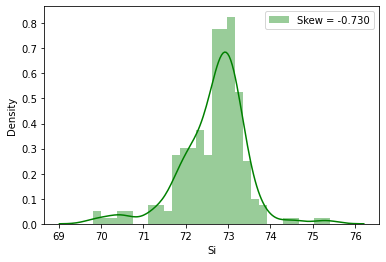

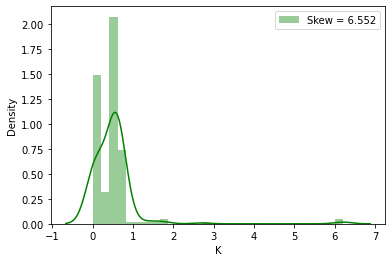

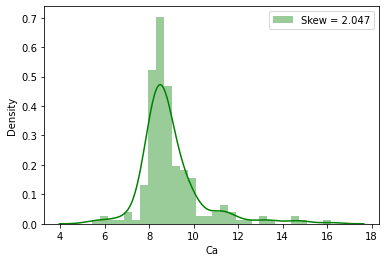

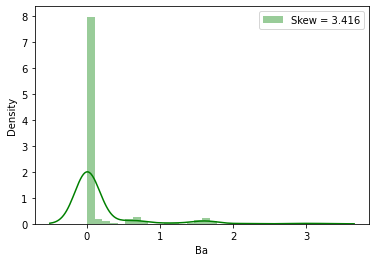

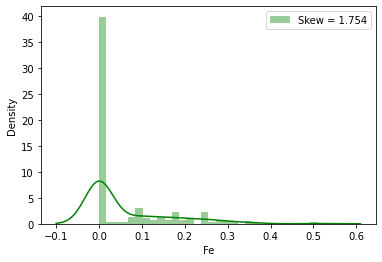

In [71]:
for feat in features:
    print("Feature Name :",feat,"\t - Skewness :",df[feat].skew())

for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= True, label='Skew = %.3f' %(skew), bins=30,color="g")
    plt.legend(loc='best')
    plt.show()   

### Multivariate Analysis


<Figure size 720x720 with 0 Axes>

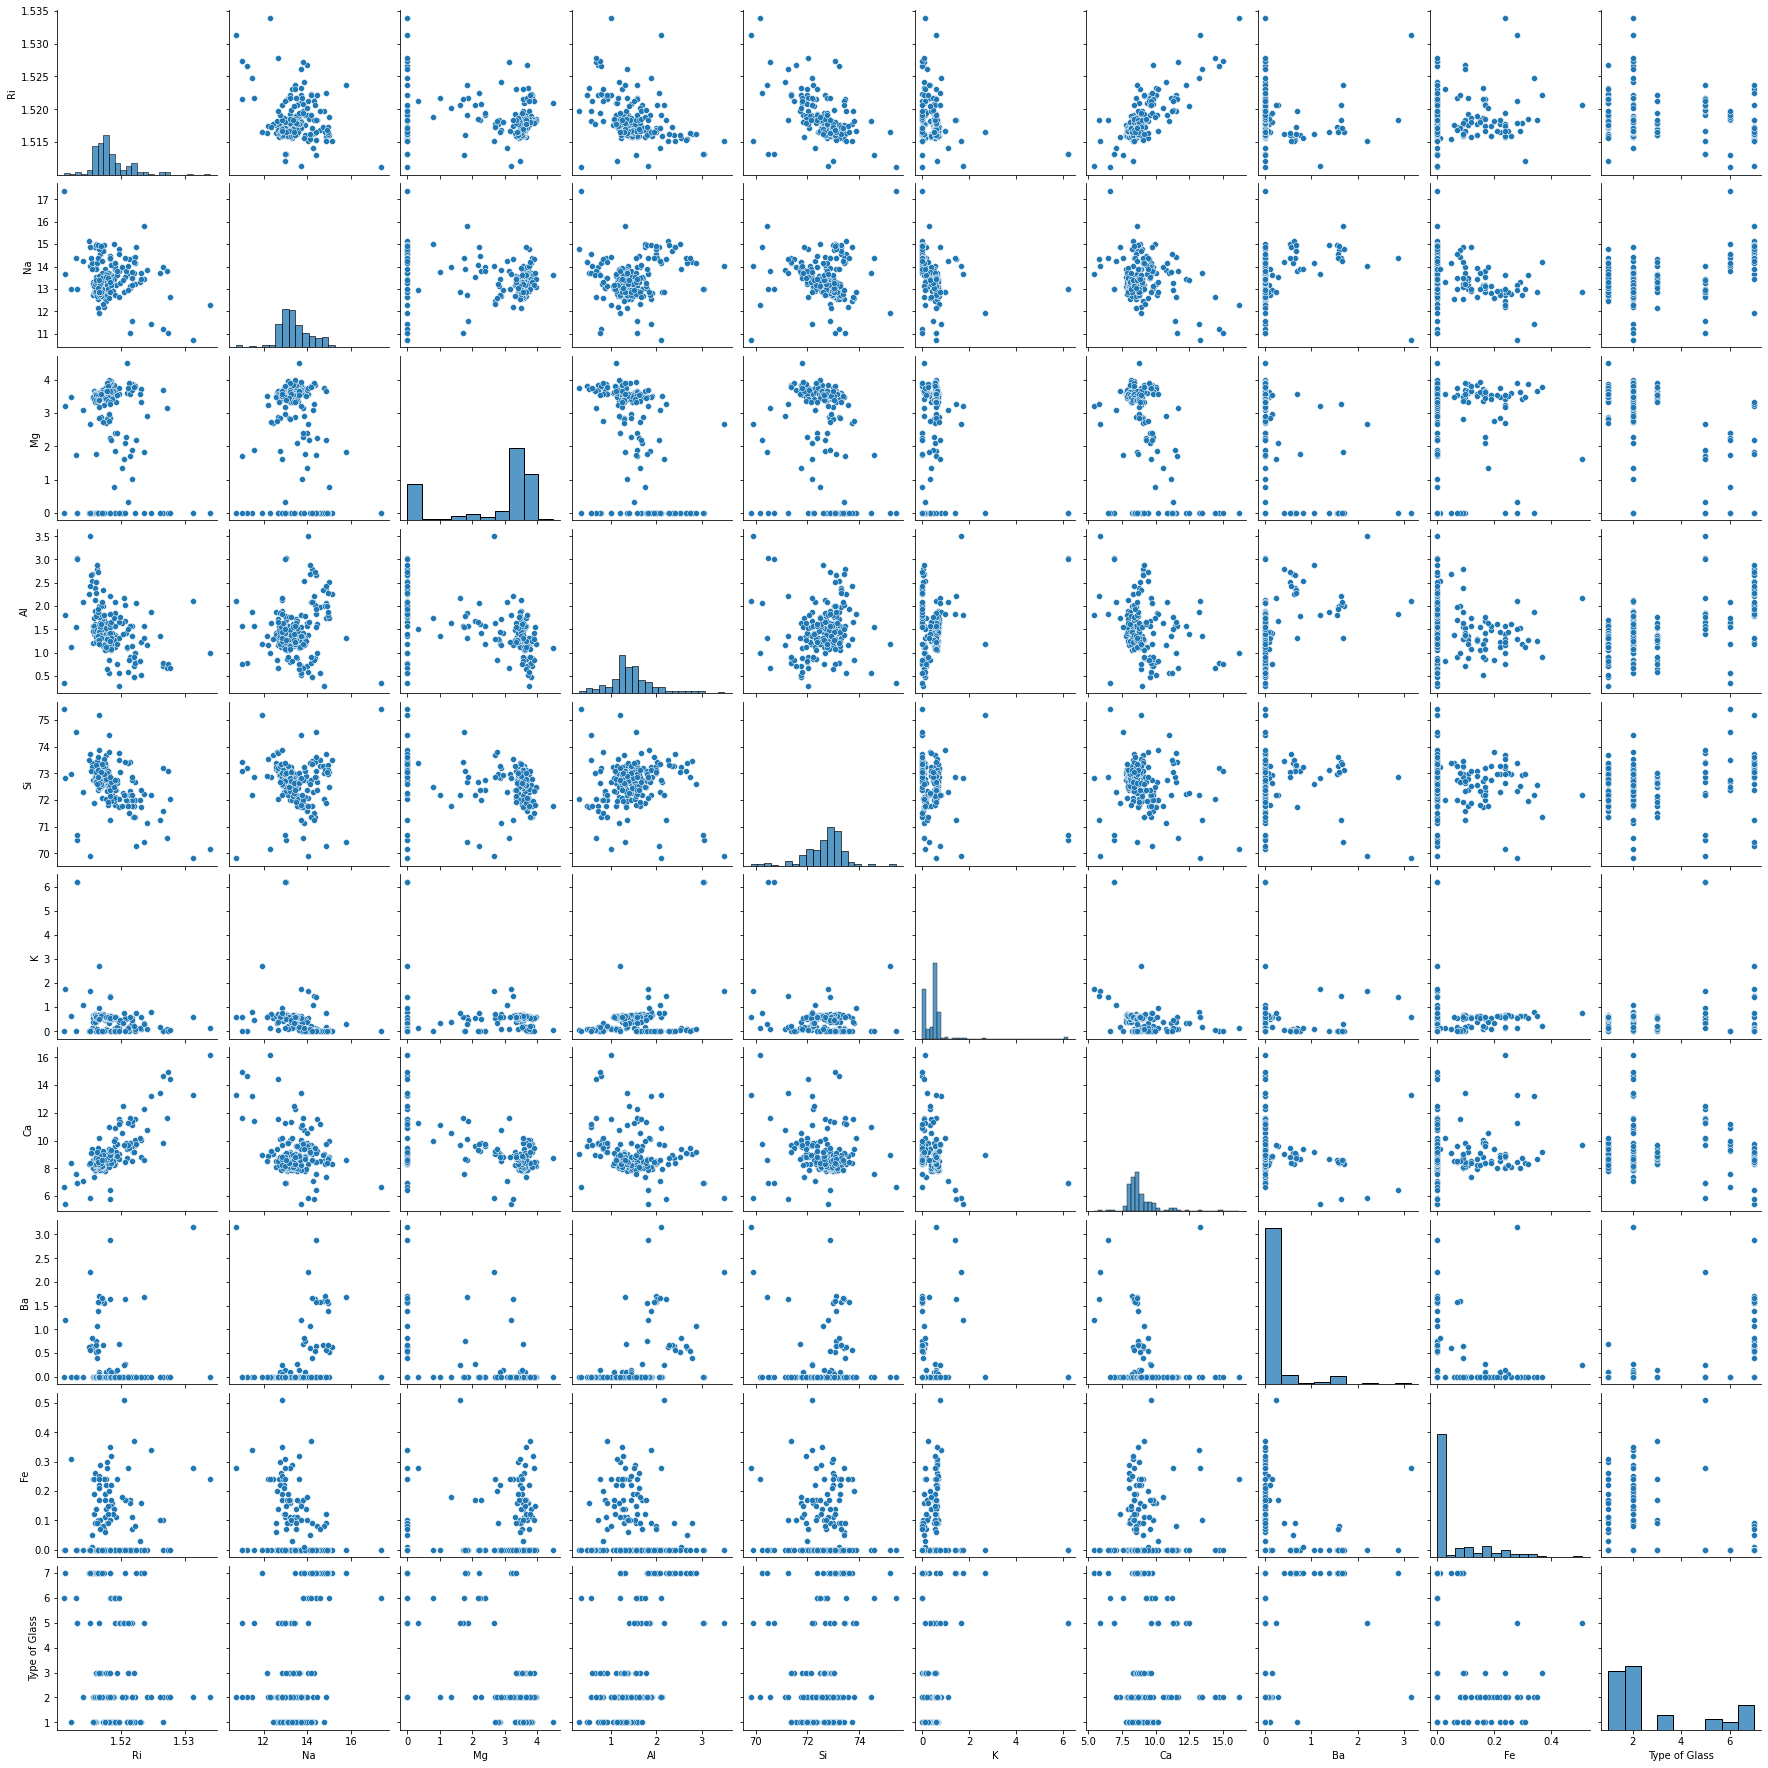

In [72]:
plt.figure(figsize=(10,10))
sns.pairplot(df[df.columns[1:]])
plt.show()

In [73]:
df.columns

Index(['Id', 'Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of Glass'],
      dtype='object')

Total Count of Each Tye of Glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64


<AxesSubplot:xlabel='Type of Glass', ylabel='count'>

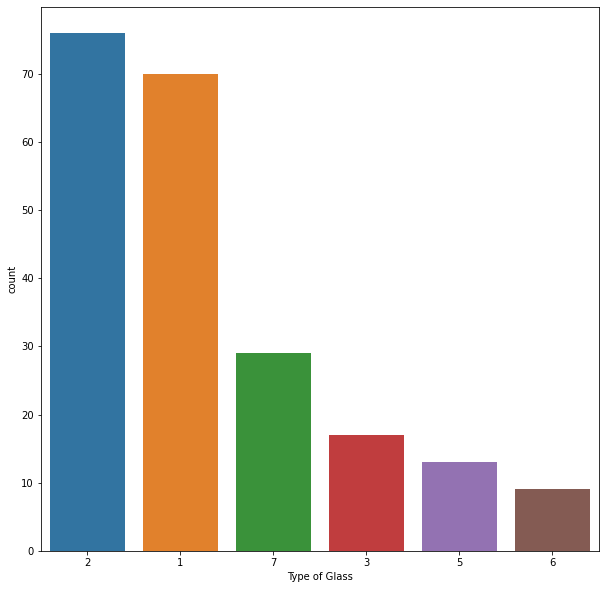

In [74]:
plt.figure(figsize=(10,10))
print("Total Count of Each Tye of Glass")
print(df["Type of Glass"].value_counts())
sns.countplot(x='Type of Glass', data=df, order=df['Type of Glass'].value_counts().index)

### Outlier checking

Feature Name :  Ri


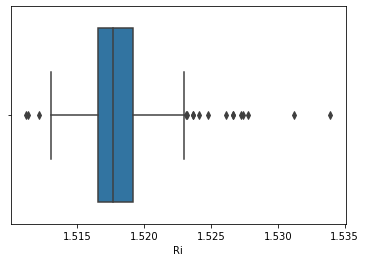

----------------------------

Feature Name :  Na


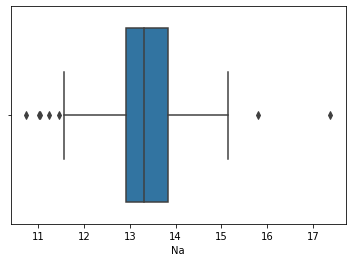

----------------------------

Feature Name :  Mg


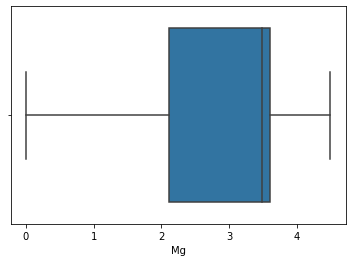

----------------------------

Feature Name :  Al


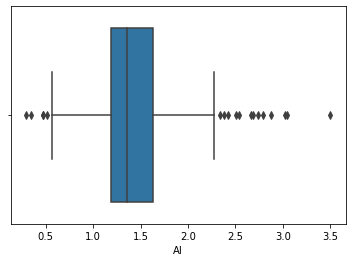

----------------------------

Feature Name :  Si


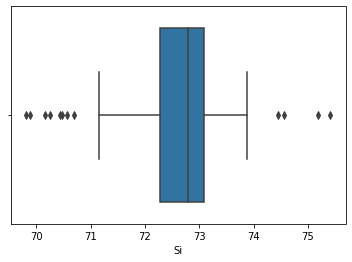

----------------------------

Feature Name :  K


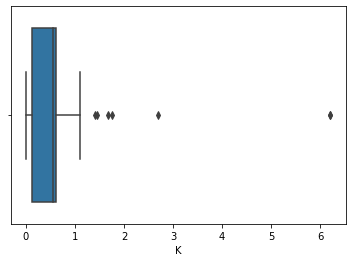

----------------------------

Feature Name :  Ca


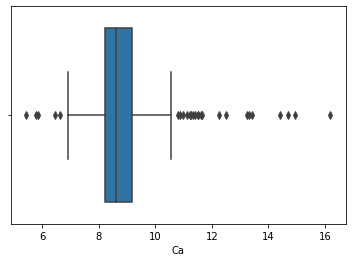

----------------------------

Feature Name :  Ba


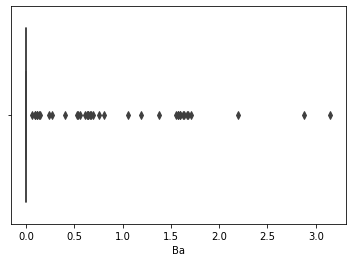

----------------------------

Feature Name :  Fe


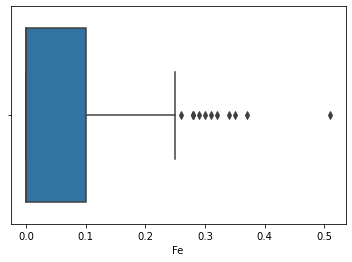

----------------------------



In [75]:
for i in df.columns[1:-1]: #  not included Id and Type of Glass columns
    print("Feature Name : ",i)
    sns.boxplot(df[i],orient="h")
    plt.show()
    print("----------------------------\n")

 **Observation**
    >>Ma has no outliers in data, 
    >>Ri,Na,Al,si,k,ca,ba,fe has outliers
   
   >  we will carry out the necessary step to remove the outlier


*Observation:*
    As per the 
    
    High skewness presents in K,CA,Ba,fe,Ri.
    which need to be treadted to remove the skewness
    

Observation  : above graph show the relationship between the features columns   

### Removing Id column before we proceed for the further analysis

In [76]:
df.drop("Id",axis=1,inplace=True)

In [77]:
df.corr()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
Ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type of Glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


### Checking the correlation

<AxesSubplot:>

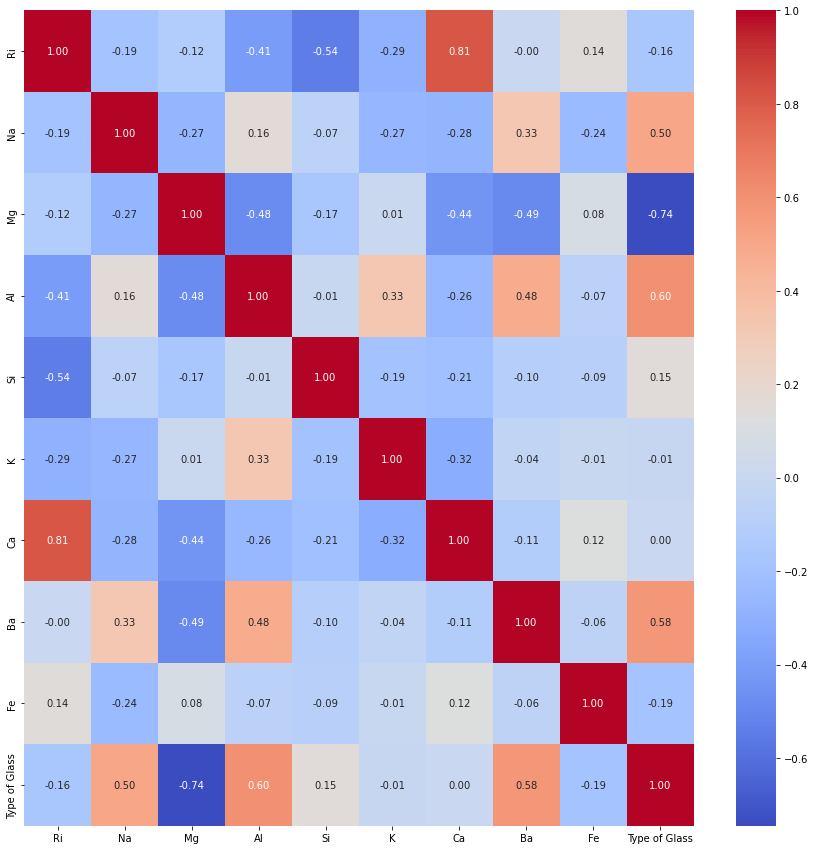

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",alpha =1, cmap="coolwarm")

#sns.heatmap(corr_mat,annot=True,fmt='.2f',alpha = 0.7,   cmap= 'coolwarm')

#### Observation :
    
    Relation with Target Columns 
    
    >> MG has strong negative relation to Target columns
    >> CA has very nominal relation to Target columns
    >> Na , Al,Ba has good positive relation to Target columns
    
    Relation with other independent columns
    >> Strong positive correlation between Ri and CA
    
    

### Data Cleaning

In [79]:
df.info() # after removing the ID columns, just rechecking again before proceed to removing outliers and scaling the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ri             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


###  Removing the outliers

In [80]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [81]:
dfnew_z = df[(z<3).all(axis=1)]
dfnew_z.shape

(194, 10)

In [82]:
df.shape

(214, 10)

## Data Loss after the outliers removal

In [83]:
datalosspercentage = (df.shape[0] - dfnew_z.shape[0])/df.shape[0]*100
print(datalosspercentage)

9.345794392523365


 % Percentage of data loss is less then 10% so which is acceptable. 

## Skewness

Feature Name :  Ri 	skewness : 0.9527325820305167


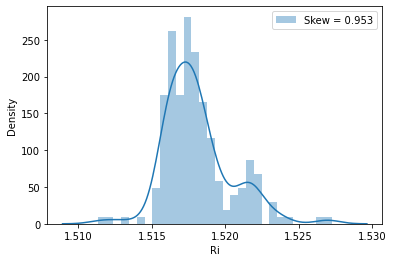

Feature Name :  Na 	skewness : 0.371482031853129


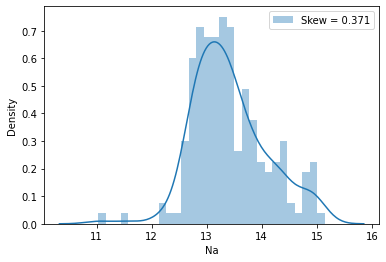

Feature Name :  Mg 	skewness : -1.5288487717139234


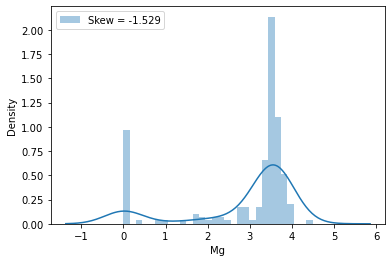

Feature Name :  Al 	skewness : 0.6582585647285744


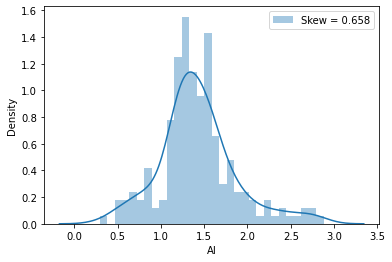

Feature Name :  Si 	skewness : -0.4254496161043749


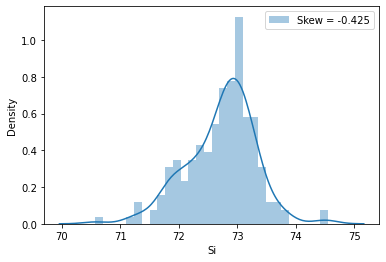

Feature Name :  K 	skewness : 0.30317482283560304


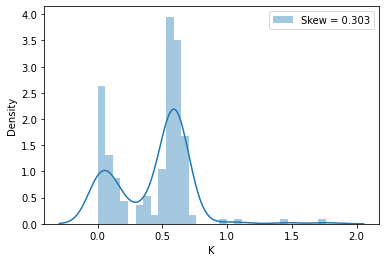

Feature Name :  Ca 	skewness : 1.0779624383107076


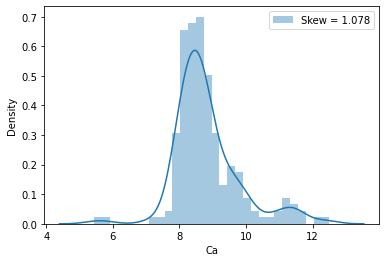

Feature Name :  Ba 	skewness : 3.1885867703354944


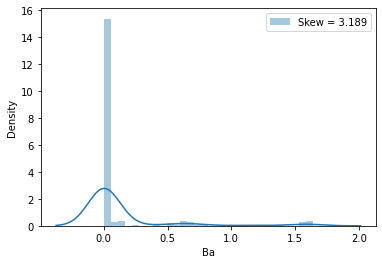

Feature Name :  Fe 	skewness : 1.4864785625583121


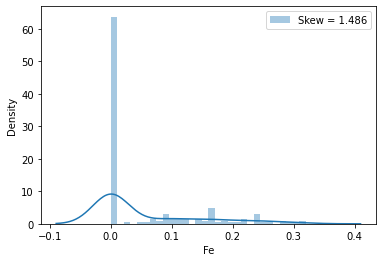

In [84]:
for clm in dfnew_z.columns[:-1]:
    skew = dfnew_z[clm].skew()
    print("Feature Name : ",clm,"\tskewness :",skew)
    sns.distplot(dfnew_z[clm],kde=True,label="Skew = %.3f"%(skew),bins=30)
    plt.legend(loc="best")
    plt.show()

### Data Cleaning for model training

In [85]:
dfnew_z

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


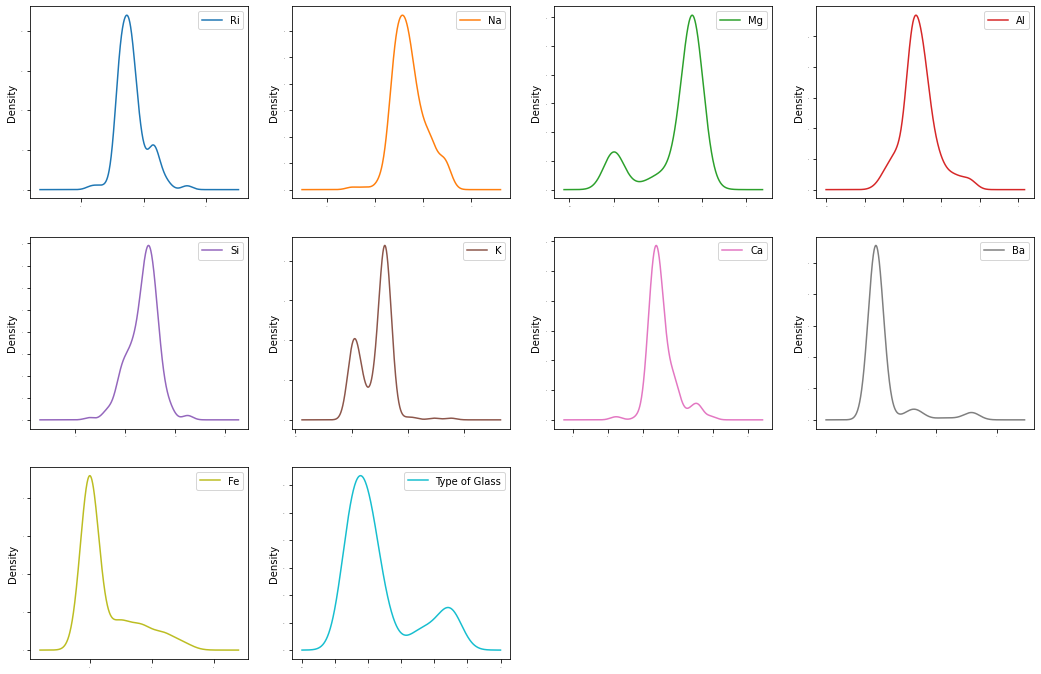

In [86]:
dfnew_z.plot(kind="density",subplots=True,layout=(3,4),sharex=False,legend=True,fontsize=1,figsize=(18,12))
plt.show()

we can see data are skewed, some are left skewed some right. 

### Preprocessing

In [87]:
# splitting the features and target variable to x and y before remvoing the skewness 

In [88]:
x = dfnew_z.iloc[:,0:-1]
y = dfnew_z.iloc[:,-1:]

In [89]:
print("X Shape : ",x.shape)
print("Y Shape : ",y.shape)

X Shape :  (194, 9)
Y Shape :  (194, 1)


In [90]:
x.skew().sort_values(ascending=False)

Ba    3.188587
Fe    1.486479
Ca    1.077962
Ri    0.952733
Al    0.658259
Na    0.371482
K     0.303175
Si   -0.425450
Mg   -1.528849
dtype: float64

Skewness should not be present, data should be present near to mean

### Power Transformer Method for removing skewness

In [92]:
from sklearn.preprocessing import PowerTransformer

In [93]:
pt = PowerTransformer(method="box-cox")
x_transformed = pt.fit_transform(x+1)


In [94]:
pd.DataFrame(x_transformed,columns=x.columns).skew().sort_values(ascending=False)

Ba    1.971225
Fe    0.858856
Si    0.036397
Al    0.014042
K     0.013983
Ri    0.000000
Na   -0.016968
Ca   -0.081738
Mg   -1.026009
dtype: float64

In [95]:
xnew = pd.DataFrame(x_transformed,columns=x.columns)

## Using Yeo Johnson method

In [96]:
from sklearn.preprocessing import PowerTransformer
yeo = PowerTransformer()
xyeo = yeo.fit_transform(x)

In [97]:
pd.DataFrame(xyeo,columns=x.columns).skew().sort_values(ascending=False)

Ba    1.971225
Fe    0.858856
Si    0.036397
Al    0.014042
K     0.013983
Ri    0.000000
Na   -0.016968
Ca   -0.081738
Mg   -1.026009
dtype: float64

### Log Transformation

In [98]:
xlog = x

In [99]:
Balog = np.log(xlog["Ba"]+0.00000000000001)

In [100]:
Balog.skew()

1.8762780077704353

In [101]:
x["Ba"]

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
208    0.54
209    1.06
210    1.59
211    1.64
212    1.57
Name: Ba, Length: 194, dtype: float64

In [102]:
### SQRT Transformation

In [103]:
xsqrt = x
Basqrt = np.sqrt(xsqrt["Ba"])
Basqrt.skew()

2.4650126207062653

#### Conclusion :  even after appliying the Boxcox, Yeo Jonhson, Log, Sqrt, i am not able to manage to reduce down the skewness in data.

> **I will go ahead with xnew data for train test split**


In [104]:
xnew.shape

(194, 9)

In [105]:
y.shape

(194, 1)

## Data Normalise 

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler= StandardScaler()
xscaled= scaler.fit_transform(xnew)

In [108]:
xscaled

array([[ 0.00000000e+00,  3.75144849e-01,  2.29506685e+00, ...,
         1.11819758e-03, -4.29499499e-01, -6.77737203e-01],
       [ 0.00000000e+00,  7.32539191e-01,  5.87338331e-01, ...,
        -1.05715663e+00, -4.29499499e-01, -6.77737203e-01],
       [ 0.00000000e+00,  2.14037626e-01,  5.07711173e-01, ...,
        -1.11977966e+00, -4.29499499e-01, -6.77737203e-01],
       ...,
       [ 0.00000000e+00,  2.08782891e+00, -1.94767390e+00, ...,
        -3.81688287e-01,  2.49873754e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.37327598e+00, -1.94767390e+00, ...,
        -3.36777928e-01,  2.49875344e+00, -6.77737203e-01],
       [ 0.00000000e+00,  1.39968197e+00, -1.94767390e+00, ...,
        -2.92174641e-01,  2.49873008e+00, -6.77737203e-01]])

In [109]:
x1 = pd.DataFrame(xscaled,columns=x.columns)

### Model Training  - As this is multiclass classification 

In [110]:
x1

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.0,0.375145,2.295067,-0.705895,-1.551856,-1.348170,0.001118,-0.429499,-0.677737
1,0.0,0.732539,0.587338,-0.073256,-0.037058,0.204416,-1.057157,-0.429499,-0.677737
2,0.0,0.214038,0.507711,0.333353,0.425596,-0.114085,-1.119780,-0.429499,-0.677737
3,0.0,-0.268665,0.734829,-0.237973,-0.243294,0.516387,-0.587678,-0.429499,-0.677737
4,0.0,-0.176527,0.619650,-0.358065,0.590922,0.447598,-0.764376,-0.429499,-0.677737
...,...,...,...,...,...,...,...,...,...
189,0.0,1.386487,-1.947674,2.583074,0.173749,-1.585876,0.703768,2.473388,-0.677737
190,0.0,1.078256,-1.947674,2.806651,-0.243294,-1.269960,0.442024,2.497782,-0.677737
191,0.0,2.087829,-1.947674,1.258957,0.553948,-1.585876,-0.381688,2.498738,-0.677737
192,0.0,1.373276,-1.947674,1.316672,1.240457,-1.585876,-0.336778,2.498753,-0.677737


In [54]:
x1.shape

(194, 9)

In [55]:
x1

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.0,0.375145,2.295067,-0.705895,-1.551856,-1.348170,0.001118,-0.429499,-0.677737
1,0.0,0.732539,0.587338,-0.073256,-0.037058,0.204416,-1.057157,-0.429499,-0.677737
2,0.0,0.214038,0.507711,0.333353,0.425596,-0.114085,-1.119780,-0.429499,-0.677737
3,0.0,-0.268665,0.734829,-0.237973,-0.243294,0.516387,-0.587678,-0.429499,-0.677737
4,0.0,-0.176527,0.619650,-0.358065,0.590922,0.447598,-0.764376,-0.429499,-0.677737
...,...,...,...,...,...,...,...,...,...
189,0.0,1.386487,-1.947674,2.583074,0.173749,-1.585876,0.703768,2.473388,-0.677737
190,0.0,1.078256,-1.947674,2.806651,-0.243294,-1.269960,0.442024,2.497782,-0.677737
191,0.0,2.087829,-1.947674,1.258957,0.553948,-1.585876,-0.381688,2.498738,-0.677737
192,0.0,1.373276,-1.947674,1.316672,1.240457,-1.585876,-0.336778,2.498753,-0.677737


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
        

In [135]:
maxAccu = 0
bestRs = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.20,random_state=i)
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred_dt=dt.predict(x_test)
    acc_dt = accuracy_score(y_test,pred_dt)
    
    print("Testing Accuracy :",acc_dt,"random_state : ",i)
    
    if acc_dt > maxAccu:
        maxAccu = acc_dt
        bestRs = i
        print("Max Accuracy ",maxAccu,"Max Random State",i)
        print("\n")
        

Testing Accuracy : 0.6153846153846154 random_state :  1
Max Accuracy  0.6153846153846154 Max Random State 1


Testing Accuracy : 0.6666666666666666 random_state :  2
Max Accuracy  0.6666666666666666 Max Random State 2


Testing Accuracy : 0.5897435897435898 random_state :  3
Testing Accuracy : 0.6666666666666666 random_state :  4
Testing Accuracy : 0.5641025641025641 random_state :  5
Testing Accuracy : 0.5128205128205128 random_state :  6
Testing Accuracy : 0.6923076923076923 random_state :  7
Max Accuracy  0.6923076923076923 Max Random State 7


Testing Accuracy : 0.5641025641025641 random_state :  8
Testing Accuracy : 0.6666666666666666 random_state :  9
Testing Accuracy : 0.5641025641025641 random_state :  10
Testing Accuracy : 0.6666666666666666 random_state :  11
Testing Accuracy : 0.5128205128205128 random_state :  12
Testing Accuracy : 0.6666666666666666 random_state :  13
Testing Accuracy : 0.6153846153846154 random_state :  14
Testing Accuracy : 0.5641025641025641 random_stat

In [136]:
print("Test Accuracy :",maxAccu,"\tRandom Stats:",bestRs)

Test Accuracy : 0.7692307692307693 	Random Stats: 65


In [138]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [139]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.20,random_state=65)

### Model : Decision Tree Classifier

In [140]:
from sklearn.metrics import mean_squared_error
dtr=DecisionTreeRegressor(random_state=bestRs)
dtr.fit(x_train,y_train)
pred_dt = dtr.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_dt)*100)
print("\n",confusion_matrix(y_test,pred_dt))
print("Classification _report",classification_report(y_test,pred_dt))

Accuracy Score :  71.7948717948718

 [[ 9  6  0  0  0  0]
 [ 2 11  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 1  0  0  0  0  4]]
Classification _report               precision    recall  f1-score   support

           1       0.75      0.60      0.67        15
           2       0.58      0.85      0.69        13
           3       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      0.80      0.89         5

    accuracy                           0.72        39
   macro avg       0.72      0.62      0.65        39
weighted avg       0.74      0.72      0.71        39



In [141]:
dtr=dtr=DecisionTreeRegressor()
cvs_dtr = cross_val_score(dtr,x1,y,cv=4)
print(cvs_dtr)
print("DTR - Cross Validation Score : ",cvs_dtr.mean())

print("\n Checking MSE score and RMSE score")
mse = mean_squared_error(y_test,pred_dt)
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

[  0.         -10.5        -22.7         -6.96729354]
DTR - Cross Validation Score :  -10.041823385118562

 Checking MSE score and RMSE score
MSE : 1.3846153846153846
RMSE : 1.1766968108291043


## Random Forest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf= rf.predict(x_test)

print("Accuracy Score :",accuracy_score(y_test,pred_rf)*100)
print("\n",confusion_matrix(y_test,pred_rf))
print("\nClassification Reort :",classification_report(y_test,pred_rf))

Accuracy Score : 82.05128205128204

 [[10  5  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 1  0  0  0  0  4]]

Classification Reort :               precision    recall  f1-score   support

           1       0.91      0.67      0.77        15
           2       0.68      1.00      0.81        13
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      0.80      0.89         5

    accuracy                           0.82        39
   macro avg       0.77      0.74      0.75        39
weighted avg       0.83      0.82      0.81        39



In [143]:
csv_rf = cross_val_score(rf,x1,y,cv=4)
print("RF Cross Val Score :",csv_rf.mean())
print("\n Checking MSE and RMSE")
mse = mean_squared_error(y_test,pred_rf)
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

RF Cross Val Score : 0.6757015306122449

 Checking MSE and RMSE
MSE : 1.0769230769230769
RMSE : 1.0377490433255416


## SVC Model

In [144]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy Score :",accuracy_score(y_test,pred_svc)*100)
print("\n",confusion_matrix(y_test,pred_svc))
print("\nClassification Report :",classification_report(y_test,pred_svc))

Accuracy Score : 82.05128205128204

 [[13  2  0  0  0  0]
 [ 2 11  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 1  0  0  0  0  4]]

Classification Report :               precision    recall  f1-score   support

           1       0.81      0.87      0.84        15
           2       0.73      0.85      0.79        13
           3       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      0.80      0.89         5

    accuracy                           0.82        39
   macro avg       0.76      0.67      0.70        39
weighted avg       0.81      0.82      0.81        39



In [145]:
cvs_svc = cross_val_score(svc,x1,y,cv=4)
print("SVC Cross Val Score :",cvs_svc.mean())
print("\n Checking MSE and RMSE")
mse = mean_squared_error(y_test,pred_svc)
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

SVC Cross Val Score : 0.7066326530612245

 Checking MSE and RMSE
MSE : 1.2820512820512822
RMSE : 1.1322770341445958


# KNN K-Nearest Neighbhours  with hyper parameters

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
knn_clf = KNeighborsClassifier()
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])

In [147]:
parameters = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

knn_clf = GridSearchCV(knn_pipe,parameters,scoring='accuracy',cv=4)
knn_clf = knn_clf.fit(x_train,y_train)

knn_clf.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'distance'}

In [148]:
knn = KNeighborsClassifier(
    n_neighbors=7,          # The number of neighbours to consider
    weights='distance',      # How to weight distances
    leaf_size=15,           # The leaf size to speed up searches
    n_jobs=None             # How many parallel jobs to run
)

knn.fit(x_train,y_train)
#pred_knn_train = knn.predict(x_train)

pred_knn_test= knn.predict(x_test)


#print("Train Accuracy Score :",accuracy_score(x_test,pred_knn_train)*100)
print("Test Accuracy Score :",accuracy_score(y_test,pred_knn_test)*100)

Test Accuracy Score : 79.48717948717949


In [149]:
print(confusion_matrix(y_test,pred_knn_test))
print(classification_report(y_test,pred_knn_test))

[[12  2  1  0  0  0]
 [ 3 10  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 1  0  0  0  0  4]]
              precision    recall  f1-score   support

           1       0.75      0.80      0.77        15
           2       0.77      0.77      0.77        13
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      0.80      0.89         5

    accuracy                           0.79        39
   macro avg       0.75      0.73      0.74        39
weighted avg       0.80      0.79      0.80        39




#  Comparing models

In [150]:
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from sklearn.pipeline import Pipeline
from xgboost import (XGBClassifier, plot_importance)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [157]:
Rstat = 45
n_components = 5
pipelines = []
n_estimators = 200

pipelines.append( ('SVC',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('SVC', SVC(random_state=Rstat))]) ) )


pipelines.append(('KNN',
                  Pipeline([ 
                              ('sc', StandardScaler()),
                            ('KNN', KNeighborsClassifier()) ])))
pipelines.append( ('RF',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('RF', RandomForestClassifier(random_state=Rstat, n_estimators=n_estimators)) ]) ))


pipelines.append( ('Ada',
                   Pipeline([ 
                              ('sc', StandardScaler()),
                    ('Ada', AdaBoostClassifier(random_state=Rstat,  n_estimators=n_estimators)) ]) ))

pipelines.append( ('ET',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('ET', ExtraTreesClassifier(random_state=Rstat, n_estimators=n_estimators)) ]) ))
pipelines.append( ('GB',
                   Pipeline([ 
                             ('sc', StandardScaler()),
                             ('GB', GradientBoostingClassifier(random_state=Rstat)) ]) ))

pipelines.append( ('LR',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('LR', LogisticRegression(random_state=Rstat)) ]) ))

results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=Rstat,shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring = scoring,
                                n_jobs=-1) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)


# fig = plt.figure(figsize=(12,8))    
# fig.suptitle("Algorithms comparison")
# ax = fig.add_subplot(1,1,1)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

SVC: 65.000000 (+/- 8.844725) performed in 0.065826 seconds
KNN: 64.375000 (+/- 6.525192) performed in 0.055849 seconds
RF: 73.333333 (+/- 12.740737) performed in 1.274376 seconds
Ada: 45.791667 (+/- 5.015428) performed in 1.243064 seconds
ET: 69.458333 (+/- 10.870210) performed in 0.948050 seconds
GB: 67.625000 (+/- 11.155545) performed in 1.830413 seconds
LR: 67.625000 (+/- 10.223288) performed in 0.080541 seconds


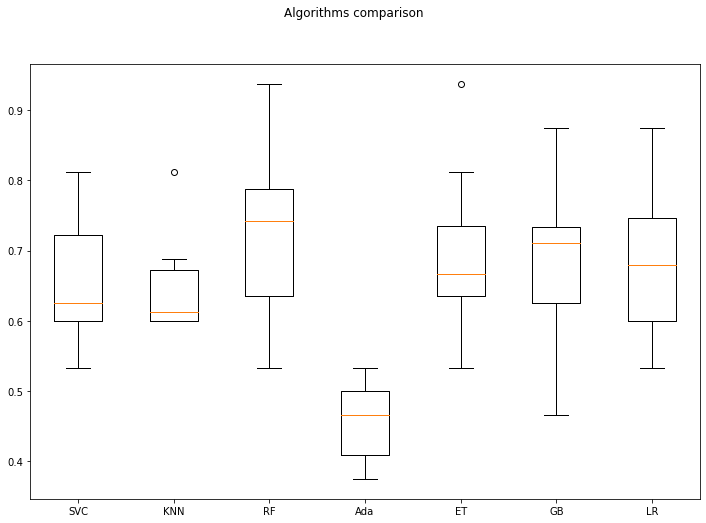

In [158]:
fig = plt.figure(figsize=(12,8))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Observation: The best performances are achieved by RF. However, RF also yields a wide distribution. It is worthy to continue our study by tuning RF.

# Tuning the Model

In [168]:
pipe_rfc = Pipeline([ 
                      ('scl', StandardScaler()), 
                    ('rfc', RandomForestClassifier(random_state=Rstat, n_jobs=-1) )])

# Set the grid parameters
param_grid_rfc =  [ {
    'rfc__n_estimators': [100, 200,300,400], # number of estimators
    #'rfc__criterion': ['gini', 'entropy'],   # Splitting criterion
    'rfc__max_features':[0.05 , 0.1], # maximum features used at each split
    'rfc__max_depth': [None, 5], # Max depth of the trees
    'rfc__min_samples_split': [0.005, 0.01], # mininal samples in leafs
    }]
# Use 10 fold CV
kfold = StratifiedKFold(n_splits=num_folds)
grid_rfc = GridSearchCV(pipe_rfc, param_grid= param_grid_rfc, cv=kfold, scoring=scoring, verbose= 1, n_jobs=-1)

#Fit the pipeline
start = time()
grid_rfc = grid_rfc.fit(x_train, y_train)
end = time()

print("RFC grid search took %.3f seconds" %(end-start))

# Best score and best parameters
print('-------Best score----------')
print(grid_rfc.best_score_ * 100.0)
print('-------Best params----------')
print(grid_rfc.best_params_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
RFC grid search took 65.183 seconds
-------Best score----------
71.41666666666666
-------Best params----------
{'rfc__max_depth': None, 'rfc__max_features': 0.05, 'rfc__min_samples_split': 0.005, 'rfc__n_estimators': 400}


In [170]:
# Fitting the above parameter to Random Forest algo and checking the score.

Final_rfc = RandomForestClassifier(max_depth=None,max_features=0.05,min_samples_split=0.005,n_estimators=400)
Final_rfc.fit(x_train,y_train)
rfc_train_score = Final_rfc.score(x_train,y_train)
pred_finalrfc = Final_rfc.predict(x_test)

rfs_Accuracy = accuracy_score(y_test,pred_finalrfc)

csv_rfc= cross_val_score(Final_rfc,x1,y,cv=4)
print("Accuracy Score :", rfs_Accuracy*100)
print("Cross Val Score", csv_rfc.mean()*100)


Accuracy Score : 76.92307692307693
Cross Val Score 67.54889455782312


Observation :  As model is not performing as expected.

In [171]:
import pickle
filename = "Glass.pkl"
pickle.dump(Final_rfc,open(filename,"wb"))

## End of Project ##